In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Part 1: Read in data
'''
    glob
        - The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix
    glob.glob(pathname, *, root_dir=None, dir_fd=None, recursive=False, include_hidden=False)
        - Return a possibly empty list of path names that match pathname, which must be a string containing a path specification. pathname can be either absolute (like /usr/src/Python-1.5/Makefile) or relative (like ../../Tools/*/*.gif), 
    
    Make sure the format of the spreadsheets are uniform. That is to say, for example, the column names should be the same.
'''
path = r'D:\Program Files\data_analysis_with_python\Project 4 - data\\'
all_files = glob.glob(path + 'monthly data\*.csv')
#all_files = glob.glob(r"C:\Users\aleci\Documents\fannie mae\data\monthly data\*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
print(df)

<ipython-input-2-7dd81dc66a87>:11: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))
<ipython-input-2-7dd81dc66a87>:11: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))
<ipython-input-2-7dd81dc66a87>:11: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files))


       Unnamed: 0  POOL_ID       LOAN_ID  ACT_PERIOD CHANNEL  ORIG_RATE  \
0             0.0      NaN  100043130733       12018       C      4.625   
1             1.0      NaN  102010037115       12018       R      4.125   
2             2.0      NaN  102511997214       12018       C      4.250   
3             3.0      NaN  102663545967       12018       B      4.375   
4             4.0      NaN  105586176439       12018       B      4.250   
...           ...      ...           ...         ...     ...        ...   
53214     53214.0      NaN     132265499       32022       R      3.875   
53215     53215.0      NaN     132274061       32022       R      3.500   
53216     53216.0      NaN     132274937       32022       B      4.250   
53217     53217.0      NaN     132276011       32022       B      4.250   
53218     53218.0      NaN     132278110       32022       R      3.250   

       CURR_RATE  ORIG_UPB  ISSUANCE_UPB  CURRENT_UPB  ...  state  \
0          4.625  405000.0    

In [3]:
df.head()

,Unnamed: 0,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,...,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population,ACT_PERIOD.1
0,0.0,NaN,100043130733,12018,C,4.625,4.625,405000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
1,1.0,NaN,102010037115,12018,R,4.125,4.125,431000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
2,2.0,NaN,102511997214,12018,C,4.250,4.250,636000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
3,3.0,NaN,102663545967,12018,B,4.375,4.375,650000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN
4,4.0,NaN,105586176439,12018,B,4.250,4.250,453000.0,NaN,0.0,...,CA,Orange County,America/Los_Angeles,657714949.0,NaN,US,33.84,-117.95,56630,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242072 entries, 0 to 53218
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                float64
 1   POOL_ID                   float64
 2   LOAN_ID                   int64  
 3   ACT_PERIOD                int64  
 4   CHANNEL                   object 
 5   ORIG_RATE                 float64
 6   CURR_RATE                 float64
 7   ORIG_UPB                  float64
 8   ISSUANCE_UPB              float64
 9   CURRENT_UPB               float64
 10  ORIG_TERM                 int64  
 11  ORIG_DATE                 int64  
 12  OLTV                      int64  
 13  OCLTV                     float64
 14  DTI                       float64
 15  CSCORE_B                  float64
 16  CSCORE_C                  float64
 17  PURPOSE                   object 
 18  PROP                      object 
 19  NO_UNITS                  int64  
 20  STATE                     

In [5]:
# ORIG_TERM: the length of loan time, for example, 360 means they borrowed a loan for 30 years.
df[['LOAN_ID', 'ORIG_TERM', 'ORIG_DATE']].head()

,LOAN_ID,ORIG_TERM,ORIG_DATE
0,100043130733,360,122017
1,102010037115,240,12018
2,102511997214,360,112017
3,102663545967,360,122017
4,105586176439,360,122017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242072 entries, 0 to 53218
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                float64
 1   POOL_ID                   float64
 2   LOAN_ID                   int64  
 3   ACT_PERIOD                int64  
 4   CHANNEL                   object 
 5   ORIG_RATE                 float64
 6   CURR_RATE                 float64
 7   ORIG_UPB                  float64
 8   ISSUANCE_UPB              float64
 9   CURRENT_UPB               float64
 10  ORIG_TERM                 int64  
 11  ORIG_DATE                 int64  
 12  OLTV                      int64  
 13  OCLTV                     float64
 14  DTI                       float64
 15  CSCORE_B                  float64
 16  CSCORE_C                  float64
 17  PURPOSE                   object 
 18  PROP                      object 
 19  NO_UNITS                  int64  
 20  STATE                     

In [7]:
df[['POOL_ID', 'LOAN_ID']].nunique()

POOL_ID          0
LOAN_ID    1117951
dtype: int64

In [8]:
# ORIG_UPB: original unpaid balance
df.sort_values(by = 'LOAN_ID', inplace = True)
df[['LOAN_ID', 'ORIG_RATE', 'ORIG_UPB', 'ORIG_DATE']].head(30)

,LOAN_ID,ORIG_RATE,ORIG_UPB,ORIG_DATE
0,97473078,4.250,674000.0,72019
0,97473078,4.250,674000.0,72019
0,97473078,4.250,674000.0,72019
96,97473081,5.375,223000.0,62019
202,97473081,5.375,223000.0,62019
328,97473081,5.375,223000.0,62019
916,97473083,4.875,451000.0,62019
1406,97473083,4.875,451000.0,62019
446,97473083,4.875,451000.0,62019
879,97473089,4.250,534000.0,62019


In [9]:
# delete duplicated loans
df_nodup = df.drop_duplicates(subset = 'LOAN_ID', keep = 'first')
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117951 entries, 0 to 17336
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1111879 non-null  float64
 1   POOL_ID                   0 non-null        float64
 2   LOAN_ID                   1117951 non-null  int64  
 3   ACT_PERIOD                1117951 non-null  int64  
 4   CHANNEL                   1117951 non-null  object 
 5   ORIG_RATE                 1117951 non-null  float64
 6   CURR_RATE                 1116774 non-null  float64
 7   ORIG_UPB                  1117951 non-null  float64
 8   ISSUANCE_UPB              0 non-null        float64
 9   CURRENT_UPB               1117951 non-null  float64
 10  ORIG_TERM                 1117951 non-null  int64  
 11  ORIG_DATE                 1117951 non-null  int64  
 12  OLTV                      1117951 non-null  int64  
 13  OCLTV                     111

In [10]:
df['OLTV'].describe()

count    2.242072e+06
mean     6.204318e+01
std      1.910558e+01
min      2.000000e+00
25%      4.900000e+01
50%      6.300000e+01
75%      7.500000e+01
max      9.700000e+01
Name: OLTV, dtype: float64

In [11]:
## Part 2: Interest Rate and Mortgage Origination
# How does interest rate impact mortgage originations?

# combine origination data with interest rate?
df_nodup['orig_month'] = (df_nodup['ORIG_DATE'] / 10000).apply(np.floor)
df_nodup['orig_year'] = df_nodup['ORIG_DATE'] - df_nodup['orig_month'] * 10000
df_nodup['orig_year_month'] = (df_nodup['orig_year'] * 100 + df_nodup['orig_month']).astype(int)

df_nodup[['LOAN_ID', 'ORIG_DATE', 'orig_year_month']]

<ipython-input-11-b31d4f3c6173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['orig_month'] = (df_nodup['ORIG_DATE'] / 10000).apply(np.floor)
<ipython-input-11-b31d4f3c6173>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['orig_year'] = df_nodup['ORIG_DATE'] - df_nodup['orig_month'] * 10000
<ipython-input-11-b31d4f3c6173>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,LOAN_ID,ORIG_DATE,orig_year_month
0,97473078,72019,201907
96,97473081,62019,201906
916,97473083,62019,201906
879,97473089,62019,201906
1311,97473091,62019,201906
...,...,...,...
5855,999984487607,62018,201806
15391,999986905499,52018,201805
6623,999988608316,82018,201808
9090,999996626839,92018,201809


In [12]:
# Aggregate loans by purpose and by month
df_sum = df_nodup.groupby(['PURPOSE', 'orig_year_month'])['LOAN_ID'].count().reset_index()

In [13]:
df_sum

,PURPOSE,orig_year_month,LOAN_ID
0,C,201612,3
1,C,201701,17
2,C,201702,21
3,C,201703,12
4,C,201704,15
...,...,...,...
188,R,202111,7698
189,R,202112,6347
190,R,202201,4614
191,R,202202,2764


In [14]:
# Get separate loans
loan_purchase = df_sum[df_sum['PURPOSE'] == 'P'].rename(columns = {'LOAN_ID': 'purchase_cnt'})
loan_refinance = df_sum[df_sum['PURPOSE'] == 'R'].rename(columns = {'LOAN_ID': 'refinance_cnt'})
loan_cashout = df_sum[df_sum['PURPOSE'] == 'C'].rename(columns = {'LOAN_ID': 'cashout_cnt'})

In [15]:
rate_file = pd.read_excel(path + 'historical 30-year mortgage rates.xls')
rate_file.head()

,year_month,Rate
0,201801,4.03
1,201802,4.33
2,201803,4.44
3,201804,4.47
4,201805,4.59


In [16]:
loan_refinance.head()

,PURPOSE,orig_year_month,refinance_cnt
128,R,201610,1
129,R,201612,3
130,R,201701,11
131,R,201702,10
132,R,201703,4


In [17]:
from functools import reduce

'''
    reduce
        - Applies function of two arguments cumulatively to the items of iterable, from left to right, so as to reduce the iterable to a single value.
        
        >>> reduce(lambda x, y: x+y, [1, 2, 3, 4]) # the left argument, x, is the accumulated value and the right argument, y, is the update value from the iterable.
        10 # ((1+2)+3)+4)
        >>> reduce(lambda x, y: x-y, [125, 25, 5, 1])
        94 # ((125-25)-5)-1)
        >>> reduce(lambda x, y: x*y, [2, 2, 2, 2])
        16 # ((2*2)*2)*2)
        >>> reduce(lambda x, y: x/y, [125, 25, 5, 1])
        1 # ((125/25)/5)/1)
        >>> reduce(lambda x, y: x*y, [1])
        1
'''

rate_file = rate_file.rename(columns = {'year_month': 'orig_year_month'})
allfiles = [loan_purchase, loan_refinance, loan_cashout, rate_file]
allcombined = reduce(lambda left, right: pd.merge(left, right, on = 'orig_year_month', how = 'outer'), allfiles)

In [18]:
allcombined = allcombined[(allcombined['orig_year_month'] >= 201801) & (allcombined['orig_year_month'] <= 202112)]
allcombined.head()

,PURPOSE_x,orig_year_month,purchase_cnt,PURPOSE_y,refinance_cnt,PURPOSE,cashout_cnt,Rate
13,P,201801,3421.0,R,2571,C,4318.0,4.03
14,P,201802,3203.0,R,1936,C,3717.0,4.33
15,P,201803,4234.0,R,1715,C,3943.0,4.44
16,P,201804,4323.0,R,1465,C,3677.0,4.47
17,P,201805,4755.0,R,1351,C,3506.0,4.59


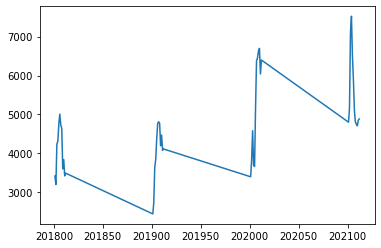

In [19]:
# Analysis 1: Interest Movement and Mortgage Origination by month
fig = plt.figure()
plt.plot(allcombined['orig_year_month'], allcombined['purchase_cnt'])

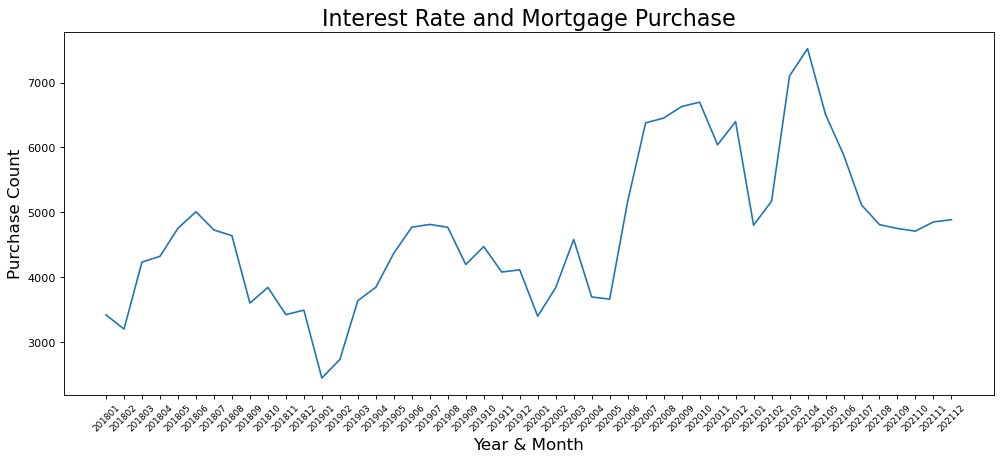

In [20]:
# The above graph does not look correct because orig_year_month is expressed in numeric
allcombined['year_month'] = allcombined['orig_year_month'].astype(str)

from matplotlib.pyplot import figure
figure(figsize = (15, 6), dpi = 80)

plt.plot(allcombined['year_month'], allcombined['purchase_cnt'])
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel('Year & Month', fontsize = 15)
plt.ylabel('Purchase Count', fontsize = 15)
plt.title("Interest Rate and Mortgage Purchase", fontsize = 20)
plt.show()

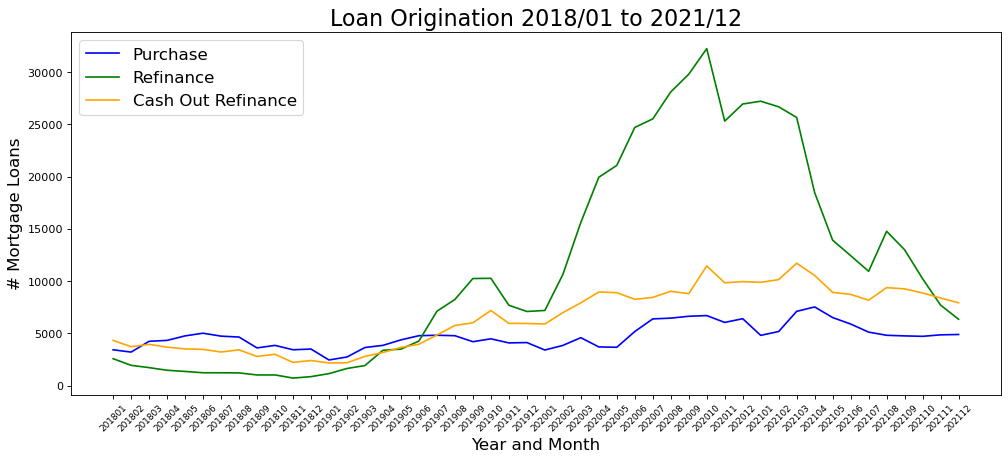

In [21]:
# draw 3 lines in 1 graph
figure(figsize = (15, 6), dpi = 80)

plt.plot(allcombined['year_month'], allcombined['purchase_cnt'], color = 'b', label = 'Purchase')
plt.plot(allcombined['year_month'], allcombined['refinance_cnt'], color = 'g', label = 'Refinance')
plt.plot(allcombined['year_month'], allcombined['cashout_cnt'], color = 'orange', label = 'Cash Out Refinance')
plt.title('Loan Origination 2018/01 to 2021/12', fontsize = 20)
plt.xlabel('Year and Month', fontsize = 15)
plt.ylabel('# Mortgage Loans', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 8)
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

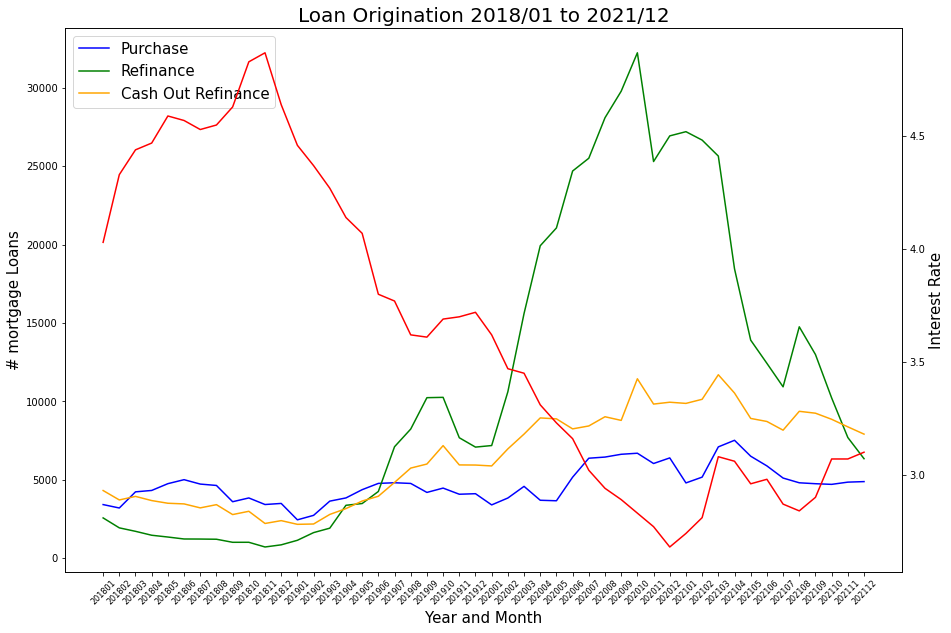

In [22]:
# add interest rate in the 2nd y axis

fig, ax1=plt.subplots(figsize=(15, 10))

ax2=ax1.twinx()
ax1.plot(allcombined['year_month'], allcombined['purchase_cnt'], color='b', label='Purchase')
ax1.plot(allcombined['year_month'], allcombined['refinance_cnt'], color='g', label='Refinance')
ax1.plot(allcombined['year_month'], allcombined['cashout_cnt'], color='orange', label='Cash Out Refinance')
ax2.plot(allcombined['year_month'], allcombined['Rate'], color='r', label='30-year Fixed Rate')

ax1.set_title('Loan Origination 2018/01 to 2021/12', fontsize=20)
ax1.set_xlabel('Year and Month', fontsize=15)
ax1.set_ylabel('# mortgage Loans', fontsize=15)
ax1.set_xticks(allcombined['year_month'])
ax1.set_xticklabels(allcombined['year_month'], rotation=45, fontsize=8)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylabel('Interest Rate', fontsize=15)

plt.show()

In [23]:
# We can roughly tell that when interest rate goes up, mortgage origination will go down
# We can do further analysis to testify our hypothesis

In [24]:
# Analysis 2: Correlation Analysis
from numpy import *
variable_list = [allcombined['Rate'], allcombined['purchase_cnt'], allcombined['refinance_cnt'], allcombined['cashout_cnt']]
corrcoef(variable_list)

array([[ 1.        , -0.66027677, -0.84592067, -0.9474206 ],
       [-0.66027677,  1.        ,  0.70272687,  0.72666304],
       [-0.84592067,  0.70272687,  1.        ,  0.88547585],
       [-0.9474206 ,  0.72666304,  0.88547585,  1.        ]])

<AxesSubplot:>

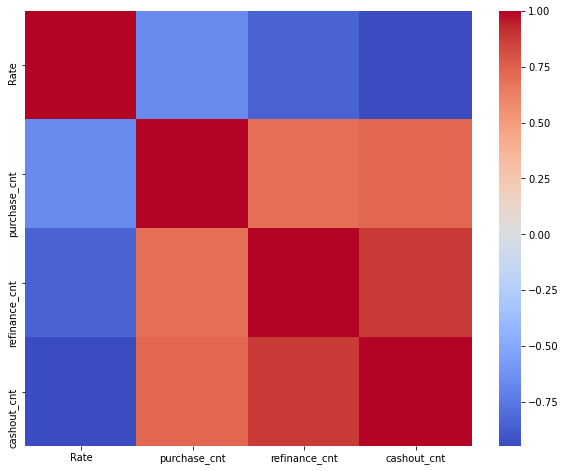

In [25]:
fig = plt.figure(figsize = (10, 8))
column_list = ['Rate', 'purchase_cnt', 'refinance_cnt', 'cashout_cnt']
sns.heatmap(allcombined[column_list].corr(), cmap = 'coolwarm')

<AxesSubplot:>

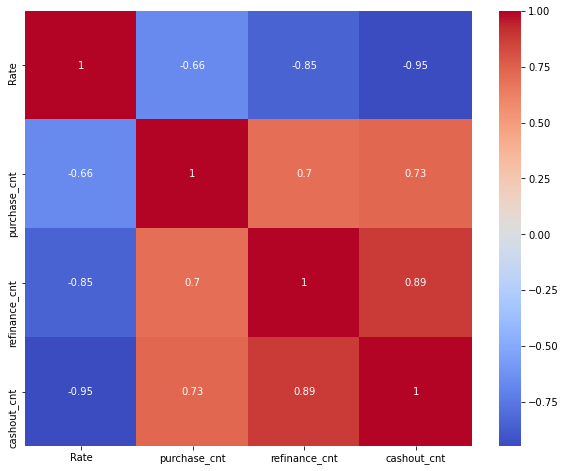

In [26]:
fig=plt.figure(figsize=(10, 8))

column_list=['Rate', 'purchase_cnt', 'refinance_cnt', 'cashout_cnt']
sns.heatmap(allcombined[column_list].corr(), cmap="coolwarm", annot=True)

<AxesSubplot:title={'center':'Correlation with Interest Rate'}>

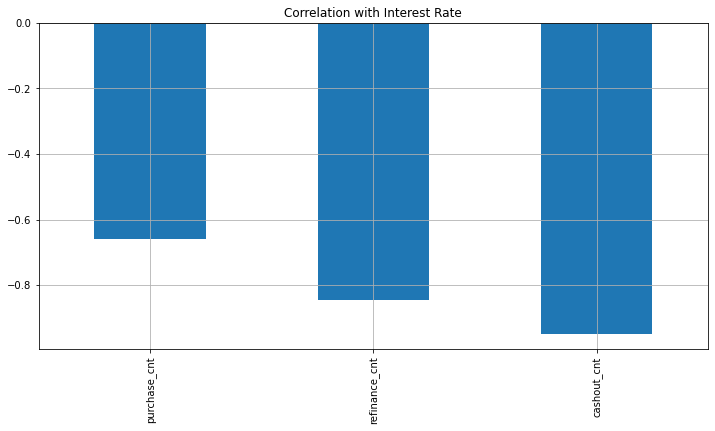

In [27]:
allcombined[['purchase_cnt', 'refinance_cnt', 'cashout_cnt']].corrwith(allcombined['Rate']).plot.bar(
    figsize = (12, 6), title = 'Correlation with Interest Rate', grid = True
)

In [28]:
'''
    Rule of Thumb
        0-0.2: no correlation
        0.2-0.4: weak correlation
        0.4-0.6: moderate correlation
        0.6-0.8: strong correlation
        0.8 and above: very strong correlation
'''
# The correlation analysis shows that mortgage purchase, refinances and cash out refinance can all be impacted by change in interest rate.
# Among three types of mortgage origination, cash out refinance is most sensitive to changes in interest rate, followed by refinance and purchase.
# This is consistent with common sense. When interest rate is low, many people to jump to the opportunity to borrow money to finance house remodeling, vacation or even investment.
# Mortgage purchase is a less elastic demand, or 刚需. People purchase houses because they have enough savings, get married or divorced, relocate to a different area due to job changes. In a word, mortgage purchase are often impacted by factors other than interest rate.

'\n    Rule of Thumb\n        0-0.2: no correlation\n        0.2-0.4: weak correlation\n        0.4-0.6: moderate correlation\n        0.6-0.8: strong correlation\n        0.8 and above: very strong correlation\n'

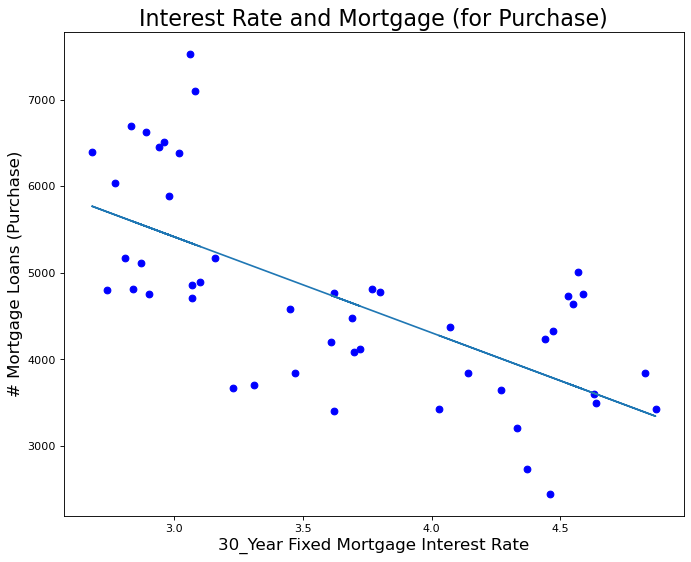

In [29]:
# Analysis 3: Regression Analysis on Interest Rate and Mortgage Origination

# rate with purchase_cnt
figure(figsize = (10, 8), dpi = 80)

x = allcombined['Rate']
y = allcombined['purchase_cnt']

plt.scatter(x, y, color = 'b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize = 15)
plt.ylabel('# Mortgage Loans (Purchase)', fontsize = 15)
plt.title('Interest Rate and Mortgage (for Purchase)', fontsize = 20)

# add regression line to show the relationship
k, b = np.polyfit(x, y, 1)
plt.plot(x, k * x + b)
plt.show()

In [30]:
import statsmodels.api as sm

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           purchase_cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     35.56
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           3.29e-07
Time:                        15:25:58   Log-Likelihood:                -392.55
No. Observations:                  48   AIC:                             789.1
Df Residuals:                      46   BIC:                             792.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8736.9018    687.396     12.710      0.0

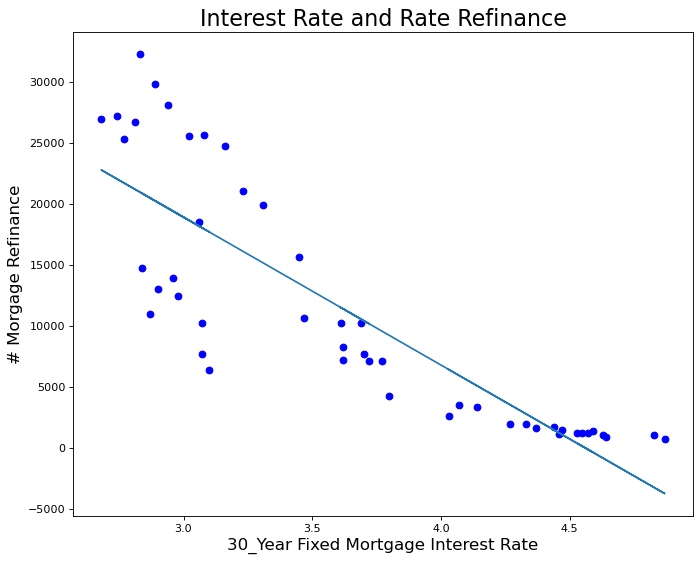

                            OLS Regression Results                            
Dep. Variable:          refinance_cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           3.79e-14
Time:                        15:25:59   Log-Likelihood:                -479.04
No. Observations:                  48   AIC:                             962.1
Df Residuals:                      46   BIC:                             965.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.524e+04   4166.700     13.258      0.0

In [31]:
# rate with refinance_cnt
figure(figsize=(10, 8), dpi=80)

x=allcombined['Rate']
y=allcombined['refinance_cnt']

plt.scatter(x, y, color='b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize=15)
plt.ylabel('# Morgage Refinance', fontsize=15)
plt.title("Interest Rate and Rate Refinance", fontsize=20)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

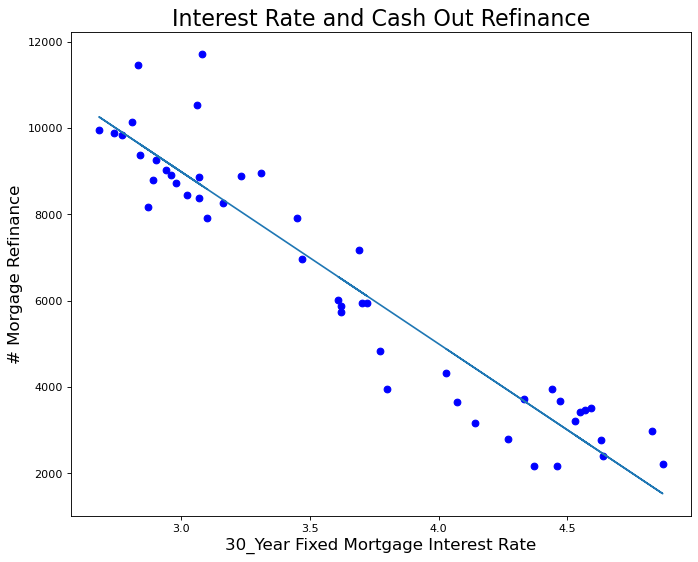

                            OLS Regression Results                            
Dep. Variable:            cashout_cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     403.2
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           2.12e-24
Time:                        15:25:59   Log-Likelihood:                -395.70
No. Observations:                  48   AIC:                             795.4
Df Residuals:                      46   BIC:                             799.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.093e+04    734.025     28.516      0.0

In [32]:
# rate with cashout_cnt
figure(figsize=(10, 8), dpi=80)

x=allcombined['Rate']
y=allcombined['cashout_cnt']

plt.scatter(x, y, color='b')
plt.xlabel('30_Year Fixed Mortgage Interest Rate', fontsize=15)
plt.ylabel('# Morgage Refinance', fontsize=15)
plt.title("Interest Rate and Cash Out Refinance", fontsize=20)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

In [33]:
# Insights from the above analysis

# Coefficient for purchase, refinance and cash out refinance are all < 0, with p value=0. It means interest has a negative impact on all three activities.
# R-squared suggests how well the dots fit the regression line. Higher R-squared means a better fitting (拟合). Its values range from 0 to 1. R-squared=1 means a perfect fitting.
# R-squared=0.898 for cash out refinance, =0.716 for refinance and =0.436 for purchase. It suggests cash out refinance is most senstive to changes in interest rate among three activities.

In [34]:
# Analysis 4: Interest Rate and Home Price

# In mortgage analysis, we usually track the change in median home prices in an area

'''
    CO: condo
    PU: planned unit development (such as townhome and detached condo)
    SF: single-family home
    MH: manufactured home (mobile home)
    
    We will focus on condo, townhome and single-family home only
'''
df_nodup.groupby('PROP')['LOAN_ID'].count()

PROP
CO    218462
CP       797
MH      3901
PU    176240
SF    718551
Name: LOAN_ID, dtype: int64

In [35]:
df[['ORIG_UPB', 'OLTV']].describe()

,ORIG_UPB,OLTV
count,2.242072e+06,2.242072e+06
mean,3.995272e+05,6.204318e+01
std,1.576074e+05,1.910558e+01
min,2.200000e+04,2.000000e+00
25%,2.850000e+05,4.900000e+01
50%,3.900000e+05,6.300000e+01
75%,5.000000e+05,7.500000e+01
max,1.867000e+06,9.700000e+01


In [36]:
# The raw data have missing values for all records for ORIGNAL_LIST_PRICE and CURRENT_LIST_PRICE
# calculate original_home_value = original_unpaid_balance / original_loan_to_value
df_nodup['home_value'] = df_nodup['ORIG_UPB'] / (df_nodup['OLTV'] / 100)

<ipython-input-36-6aef758b28b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['home_value'] = df_nodup['ORIG_UPB'] / (df_nodup['OLTV'] / 100)


In [38]:
# In our analysis, we track the median price change in zip code level (first 3 digits)
df_median_price = df_nodup.groupby(['orig_year_month', 'PROP', 'ZIP'])['home_value'].median().reset_index()
df_median_cnt = df_nodup.groupby(['orig_year_month', 'PROP', 'ZIP'])['home_value'].count().reset_index().rename(columns = {'home_value': 'home_cnt'})

df_median_price = pd.merge(df_median_price, df_median_cnt, on = ['orig_year_month', 'PROP', 'ZIP'], how = 'outer')

In [39]:
df_median_price.head()

,orig_year_month,PROP,ZIP,home_value,home_cnt
0,201610,CO,900.0,515714.285714,1
1,201612,CO,902.0,665000.000000,1
2,201612,CO,906.0,314814.814815,1
3,201612,CO,926.0,495831.185567,2
4,201612,PU,922.0,324705.882353,1


In [40]:
df_price_rate = pd.merge(df_median_price, rate_file, on = 'orig_year_month', how = 'inner')
df_price_rate = df_price_rate[(df_price_rate['orig_year_month'] >= 201801) & (df_price_rate['orig_year_month'] <= 202112)]

In [41]:
# correlation analysis
column_list = ['Rate', 'home_value']
df_price_rate.groupby(['PROP'])[column_list].corr()

Rate  home_value
PROP                                 
CO   Rate        1.000000   -0.246954
     home_value -0.246954    1.000000
CP   Rate        1.000000   -0.127462
     home_value -0.127462    1.000000
MH   Rate        1.000000   -0.178739
     home_value -0.178739    1.000000
PU   Rate        1.000000   -0.275683
     home_value -0.275683    1.000000
SF   Rate        1.000000   -0.180056
     home_value -0.180056    1.000000

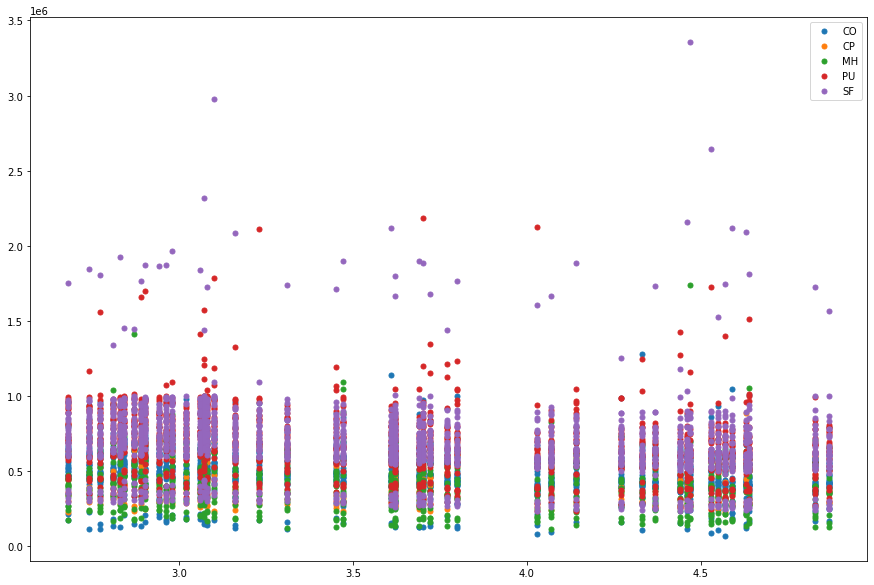

In [42]:
# use 30-year fixed rate in x axis
groups = df_price_rate.groupby('PROP')

fig, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05) # add 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Rate'], group['home_value'], marker = 'o', linestyle = '', ms = 5, label = name)
ax.legend()

plt.show()

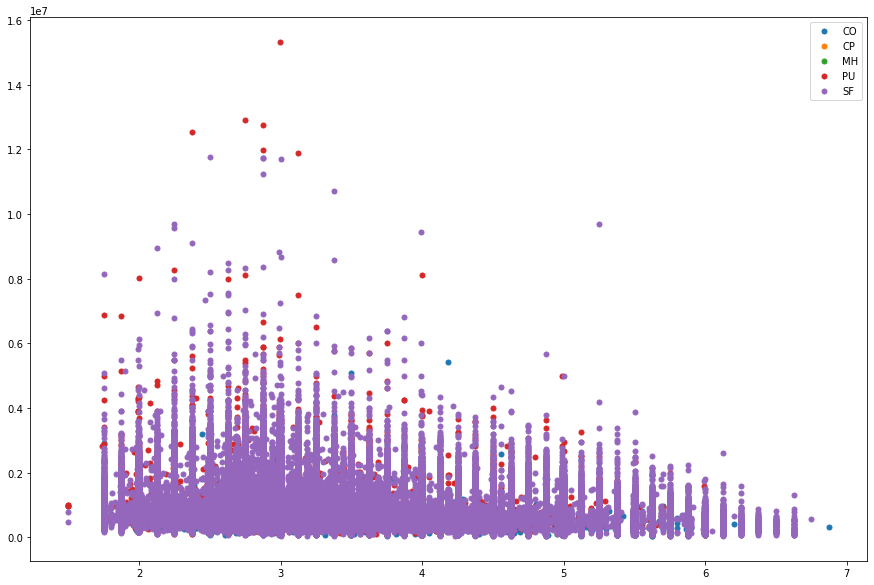

In [48]:
# The graph above uses 30-year fixed rate in the x axis, but it really doesn't dhow any pattern except MH has lower prices in general

# Try origination interest rate
groups = df_nodup.groupby('PROP')

fix, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['ORIG_RATE'], group['home_value'], marker = 'o', linestyle = '', ms = 5, label = name)
ax.legend()

plt.show()

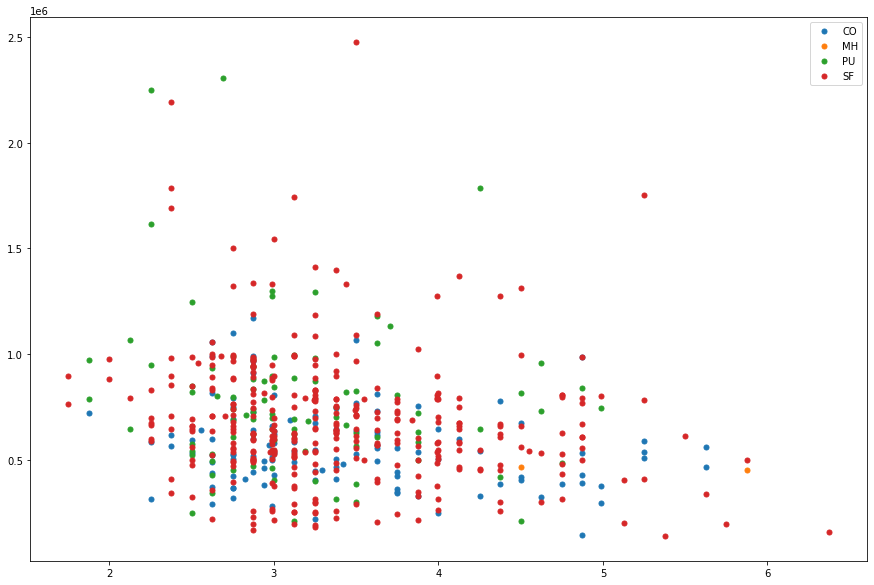

In [49]:
# grab a sample of 0.05%
sample_size = 0.0005

df_nodup2 = df_nodup[(np.random.uniform(0, 1, len(df_nodup['LOAN_ID'])) < sample_size)]
groups = df_nodup2.groupby('PROP')

fig, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['ORIG_RATE'], group['home_value'], marker = 'o', linestyle = '', ms = 5, label = name)
ax.legend()

plt.show()

In [52]:
# still can't see any pattern

array([0.3857732 , 0.18713685, 0.88794415, ..., 0.25050015, 0.77670553,
       0.61090988])

In [53]:
# Analysis 5: whether change in interest rate will cause change in house prices

df_nodup.groupby('PROP')['home_value'].median()

PROP
CO    525333.333333
CP    295000.000000
MH    359740.259740
PU    720588.235294
SF    659259.259259
Name: home_value, dtype: float64

In [56]:
df_nodup.groupby(['orig_year_month', 'PROP'])['home_value'].median()

orig_year_month  PROP
201610           CO      515714.285714
201612           CO      495831.185567
                 PU      520000.000000
                 SF      450000.000000
201701           CO      432372.696032
                             ...      
202203           CO      610526.315789
                 CP      610000.000000
                 MH      404166.666667
                 PU      800000.000000
                 SF      735483.870968
Name: home_value, Length: 304, dtype: float64

In [58]:
# calculate change in interest rate and change in mortgage price over time

'''
    pandas.DataFrame.shift
        The shift() function is used to shift index by desired number of periods with an optional time freq. 
        
        Example:
            df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                       "Col2": [13, 23, 18, 33, 48],
                       "Col3": [17, 27, 22, 37, 52]},
                      index=pd.date_range("2020-01-01", "2020-01-05"))
            df
                        Col1  Col2  Col3
            2020-01-01    10    13    17
            2020-01-02    20    23    27
            2020-01-03    15    18    22
            2020-01-04    30    33    37
            2020-01-05    45    48    52
            df.shift(periods=3)
                        Col1  Col2  Col3
            2020-01-01   NaN   NaN   NaN
            2020-01-02   NaN   NaN   NaN
            2020-01-03   NaN   NaN   NaN
            2020-01-04  10.0  13.0  17.0
            2020-01-05  20.0  23.0  27.0
'''
df_price_rate.sort_values(by = ['PROP', 'ZIP'], inplace = True)
df_price_rate['DIFF_price'] = df_price_rate.groupby(['PROP', 'ZIP'])['home_value'].apply(lambda x: x - x.shift()).fillna(0)
df_price_rate['DIFF_rate'] = df_price_rate.groupby(['PROP', 'ZIP'])['Rate'].apply(lambda x: x - x.shift()).fillna(0)

In [59]:
df_price_rate.head()

,orig_year_month,PROP,ZIP,home_value,home_cnt,Rate,DIFF_price,DIFF_rate
0,201801,CO,900.0,579159.212880,94,4.03,0.000000,0.00
100,201802,CO,900.0,553846.153846,101,4.33,-25313.059034,0.30
197,201803,CO,900.0,635144.654088,96,4.44,81298.500242,0.11
298,201804,CO,900.0,607319.078947,104,4.47,-27825.575141,0.03
397,201805,CO,900.0,615942.028986,117,4.59,8622.950038,0.12


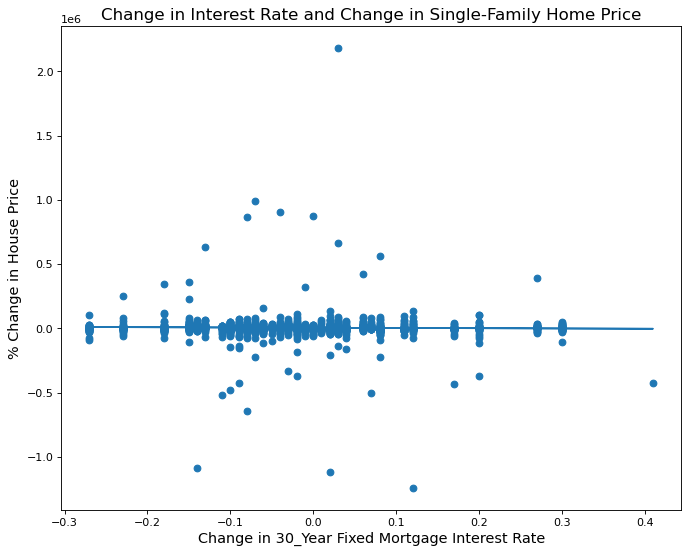

In [60]:
# SF
figure(figsize = (10, 8), dpi = 80)

df_samp = df_price_rate[df_price_rate['PROP'] == 'SF']

x = df_samp['DIFF_rate']
y = df_samp['DIFF_price']

plt.scatter(x, y)
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in Single-Family Home Price", fontsize=15)

k, b = np.polyfit(x, y, 1)
plt.plot(x, k * x + b)
plt.show()

In [61]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             DIFF_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5630
Date:                Fri, 06 Jan 2023   Prob (F-statistic):              0.453
Time:                        16:12:10   Log-Likelihood:                -18742.
No. Observations:                1439   AIC:                         3.749e+04
Df Residuals:                    1437   BIC:                         3.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4711.5230   2935.617      1.605      0.1

In [62]:
# The above analysis means interest rate will not cause a change in the single-family home price

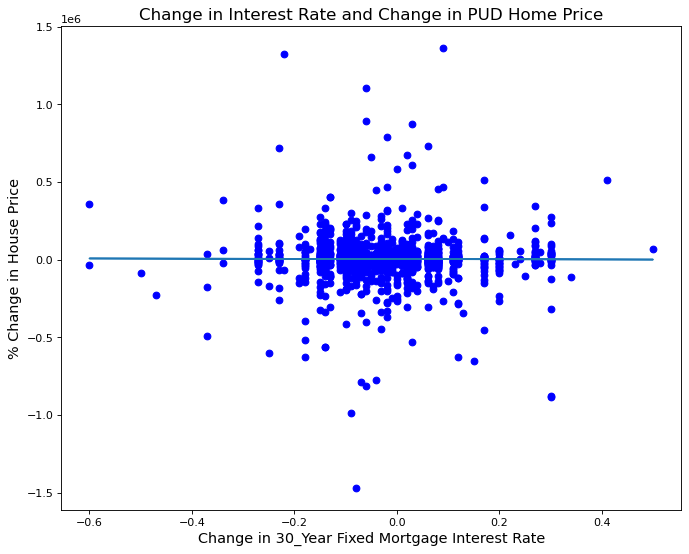

                            OLS Regression Results                            
Dep. Variable:             DIFF_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03135
Date:                Fri, 06 Jan 2023   Prob (F-statistic):              0.859
Time:                        16:18:13   Log-Likelihood:                -17293.
No. Observations:                1292   AIC:                         3.459e+04
Df Residuals:                    1290   BIC:                         3.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4134.7974   4447.370      0.930      0.3

In [63]:
# PU
figure(figsize=(10, 8), dpi=80)

df_samp=df_price_rate[df_price_rate['PROP']=='PU']

x=df_samp['DIFF_rate']
y=df_samp['DIFF_price']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in PUD Home Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

In [64]:
# change in the interest rate will not cause a change in the PU home price

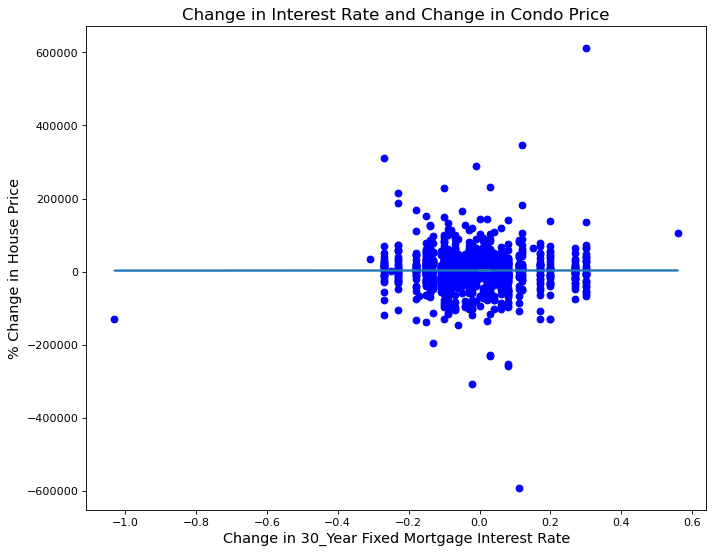

                            OLS Regression Results                            
Dep. Variable:             DIFF_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0001333
Date:                Fri, 06 Jan 2023   Prob (F-statistic):              0.991
Time:                        16:18:46   Log-Likelihood:                -17406.
No. Observations:                1418   AIC:                         3.482e+04
Df Residuals:                    1416   BIC:                         3.483e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3293.7651   1396.785      2.358      0.0

In [65]:
# CO
figure(figsize=(10, 8), dpi=80)

df_samp=df_price_rate[df_price_rate['PROP']=='CO']

x=df_samp['DIFF_rate']
y=df_samp['DIFF_price']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in Condo Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

In [66]:
# change in interest rate will not cause a change in the condo price

In [67]:
allcombined.columns.tolist()

['PURPOSE_x',
 'orig_year_month',
 'purchase_cnt',
 'PURPOSE_y',
 'refinance_cnt',
 'PURPOSE',
 'cashout_cnt',
 'Rate',
 'year_month']

In [68]:
allcombined['Rate'].describe()

count    48.000000
mean      3.636458
std       0.691278
min       2.680000
25%       3.010000
50%       3.615000
75%       4.340000
max       4.870000
Name: Rate, dtype: float64

In [69]:
def rate_tier(x):
    if x <= 2.5:
        return '2.5% or below'
    elif x <= 3:
        return '2.51% - 3%'
    elif x <= 3.5:
        return '3.01% - 3.5%'
    elif x < 4:
        return '3.51% - 4%'
    elif x < 4.5:
        return '4% - 4.5%'
    else:
        return '4.5%+'

allcombined['rate_tier'] = allcombined['Rate'].apply(rate_tier)

In [70]:
allcombined.groupby('rate_tier')[['purchase_cnt', 'refinance_cnt', 'cashout_cnt']].sum()

,purchase_cnt,refinance_cnt,cashout_cnt
rate_tier,,,
2.51% - 3%,69266.0,261293,113491.0
3.01% - 3.5%,56407.0,185832,96816.0
3.51% - 4%,34623.0,62070,45506.0
4% - 4.5%,32222.0,19243,29603.0
4.5%+,33501.0,8609,23987.0


In [71]:
rate_mortgage = allcombined.groupby('rate_tier')[['purchase_cnt', 'refinance_cnt', 'cashout_cnt']].sum().reset_index()
rate_mortgage.rename(columns = {'purchase_cnt': 'Purchase', 'refinance_cnt': 'Rate Refinance', 'cashout_cnt': 'Cash Out Refinance'}, inplace = True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2.51% - 3%'),
  Text(1, 0, '3.01% - 3.5%'),
  Text(2, 0, '3.51% - 4%'),
  Text(3, 0, '4% - 4.5%'),
  Text(4, 0, '4.5%+')])

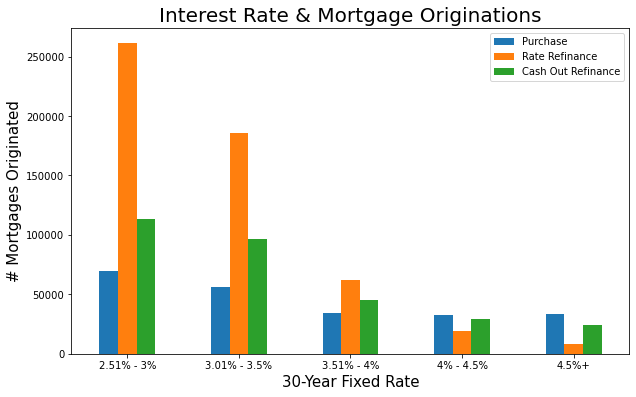

In [72]:
'''
    matplotlib.rcParams
        You can dynamically change the default rc (runtime configuration) settings in a python script or interactively from the python shell. All rc settings are stored in a dictionary-like variable called matplotlib.rcParams, which is global to the matplotlib package. 
'''
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)


rate_mortgage.plot(x = 'rate_tier', kind = 'bar', stacked = False,
                  title = 'Interest Rate & Mortgage Originations',
                  xlabel = '30-Year Rate', ylabel = '# Mortgage Originated')
plt.title('Interest Rate & Mortgage Originations', fontsize = 20)
plt.xlabel('30-Year Fixed Rate', fontsize = 15)
plt.ylabel('# Mortgages Originated', fontsize = 15)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2.51% - 3%'),
  Text(1, 0, '3.01% - 3.5%'),
  Text(2, 0, '3.51% - 4%'),
  Text(3, 0, '4% - 4.5%'),
  Text(4, 0, '4.5%+')])

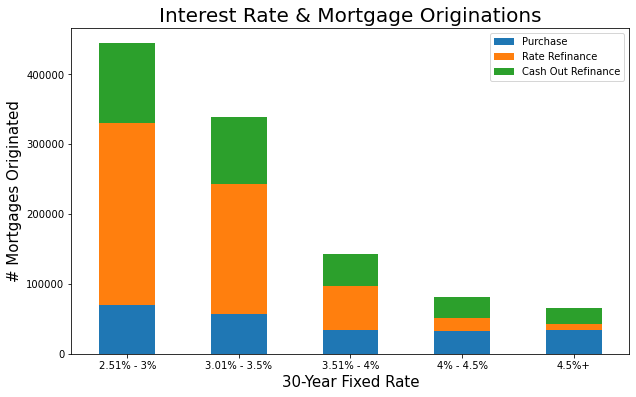

In [73]:
# another way to visualize the data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

rate_mortgage.plot(x = 'rate_tier', kind = 'bar', stacked = True,
                  title = 'Interest Rate & Mortgage Originations',
                  xlabel = '30-Year Rate', ylabel = '# Mortgage Originated')
plt.title('Interest Rate & Mortgage Originations', fontsize=20)
plt.xlabel('30-Year Fixed Rate', fontsize=15)
plt.ylabel('# Mortgages Originated', fontsize=15)
plt.xticks(rotation=0)

In [74]:
# A home does not change its price whne being refinanced
# Rate change has a big impact on refinance.
# To examine change in home price, we need to exclued refinance form the analysis

In [75]:
df_purchase = df_nodup[df_nodup['PURPOSE'].str.strip() == 'P']

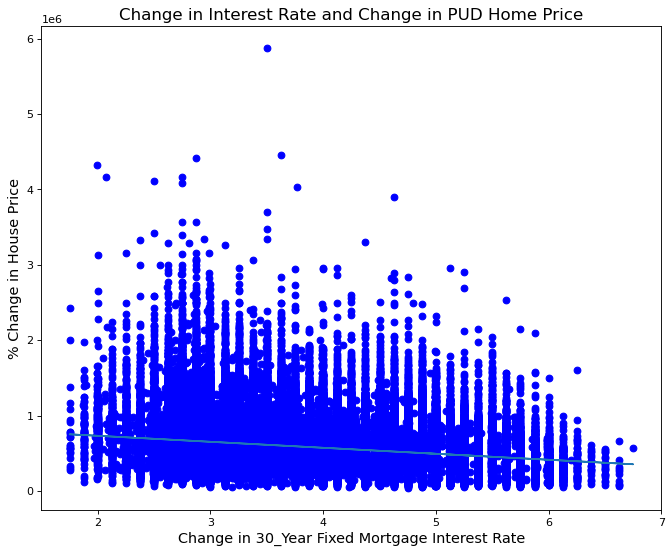

                            OLS Regression Results                            
Dep. Variable:             home_value   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:03:48   Log-Likelihood:            -3.3233e+06
No. Observations:              239827   AIC:                         6.647e+06
Df Residuals:                  239825   BIC:                         6.647e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.905e+05   2374.020    375.121      0.0

In [76]:
# Overall
figure(figsize=(10, 8), dpi=80)

df_samp=df_purchase

x=df_samp['ORIG_RATE']
y=df_samp['home_value']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in PUD Home Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

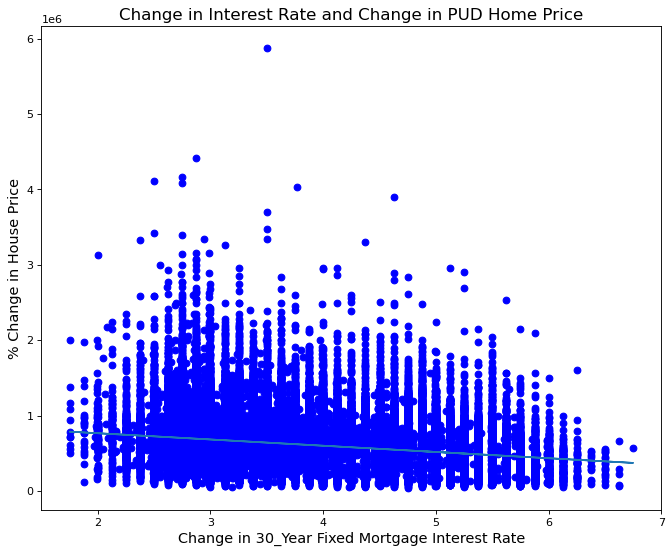

                            OLS Regression Results                            
Dep. Variable:             home_value   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     8505.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:04:27   Log-Likelihood:            -1.7014e+06
No. Observations:              122303   AIC:                         3.403e+06
Df Residuals:                  122301   BIC:                         3.403e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.314e+05   3491.368    266.778      0.0

In [77]:
# SF
figure(figsize=(10, 8), dpi=80)

df_samp=df_purchase[df_purchase['PROP'].str.strip()=='SF']

x=df_samp['ORIG_RATE']
y=df_samp['home_value']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in PUD Home Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

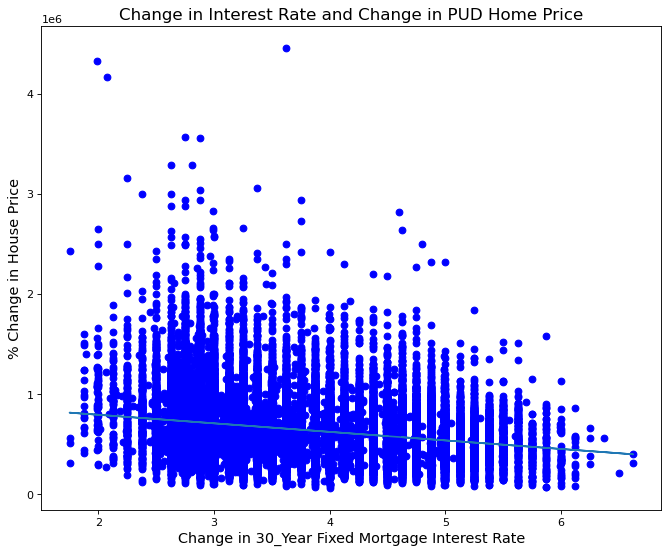

                            OLS Regression Results                            
Dep. Variable:             home_value   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2629.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:04:45   Log-Likelihood:            -5.6861e+05
No. Observations:               40815   AIC:                         1.137e+06
Df Residuals:                   40813   BIC:                         1.137e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.66e+05   6252.989    154.493      0.0

In [78]:
# PU
figure(figsize=(10, 8), dpi=80)

df_samp=df_purchase[df_purchase['PROP'].str.strip()=='PU']

x=df_samp['ORIG_RATE']
y=df_samp['home_value']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in PUD Home Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

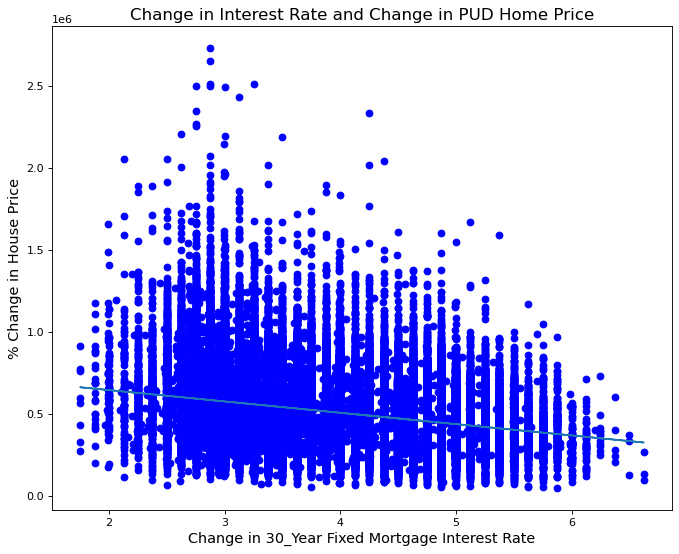

                            OLS Regression Results                            
Dep. Variable:             home_value   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6270.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:04:56   Log-Likelihood:            -1.0105e+06
No. Observations:               74309   AIC:                         2.021e+06
Df Residuals:                   74307   BIC:                         2.021e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.832e+05   3326.880    235.402      0.0

In [79]:
# CO
figure(figsize=(10, 8), dpi=80)

df_samp=df_purchase[df_purchase['PROP'].str.strip()=='CO']

x=df_samp['ORIG_RATE']
y=df_samp['home_value']

plt.scatter(x, y, color='b')
plt.xlabel('Change in 30_Year Fixed Mortgage Interest Rate', fontsize=13)
plt.ylabel('% Change in House Price', fontsize=13)
plt.title("Change in Interest Rate and Change in PUD Home Price", fontsize=15)

# add a regression line to show the relationship
m, b=np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

# Regression analysis
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

In [80]:
# Analysis 5: home price changes over time in southern California
df_price_rate['year_month'] = df_price_rate['orig_year_month'].astype(str)

In [86]:
# aggregate the house prices of all area to the level of southern California
# Because different areas have different volumns of transactions, we need to use weighted average
# Number of transactions (mortgage originations) is used as the weight
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

weighted_price = df_price_rate.groupby(['PROP', 'year_month']).apply(w_avg, 'home_value', 'home_cnt').reset_index().rename(columns = {'0': 'home_price'})
column_names = ['PROP', 'year_month', 'home_price']
weighted_price = weighted_price.set_axis(column_names, axis = 1, inplace = False)

In [87]:
weighted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROP        240 non-null    object 
 1   year_month  240 non-null    object 
 2   home_price  240 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.8+ KB


In [88]:
weighted_price.head(20)

,PROP,year_month,home_price
0,CO,201801,438787.183095
1,CO,201802,446114.003771
2,CO,201803,447887.706060
3,CO,201804,442925.000496
4,CO,201805,447785.990643
5,CO,201806,444840.437175
6,CO,201807,451787.339039
7,CO,201808,453191.284660
8,CO,201809,443252.254134
9,CO,201810,441980.801380


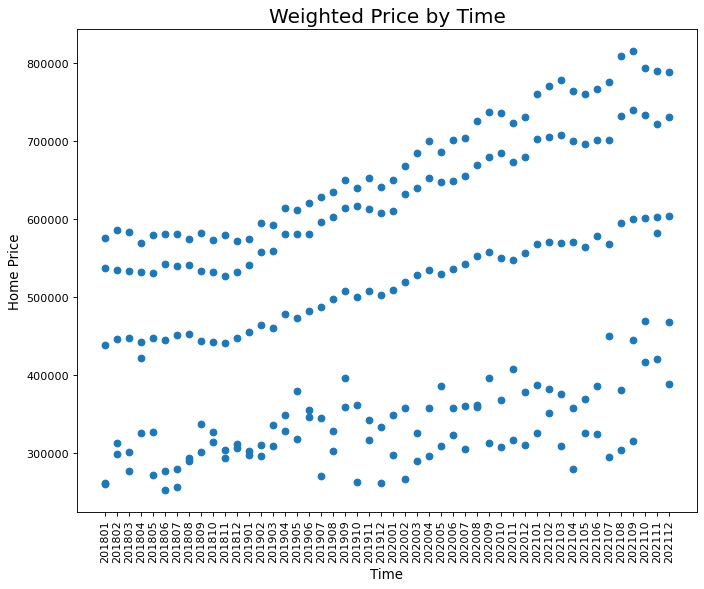

In [91]:
figure(figsize = (10, 8), dpi = 80)

plt.scatter(weighted_price['year_month'], weighted_price['home_price'])
plt.xlabel('Time', fontsize=12)
plt.ylabel('Home Price', fontsize=12)
plt.title('Weighted Price by Time', fontsize=18)
plt.xticks(rotation = 90)
plt.show()

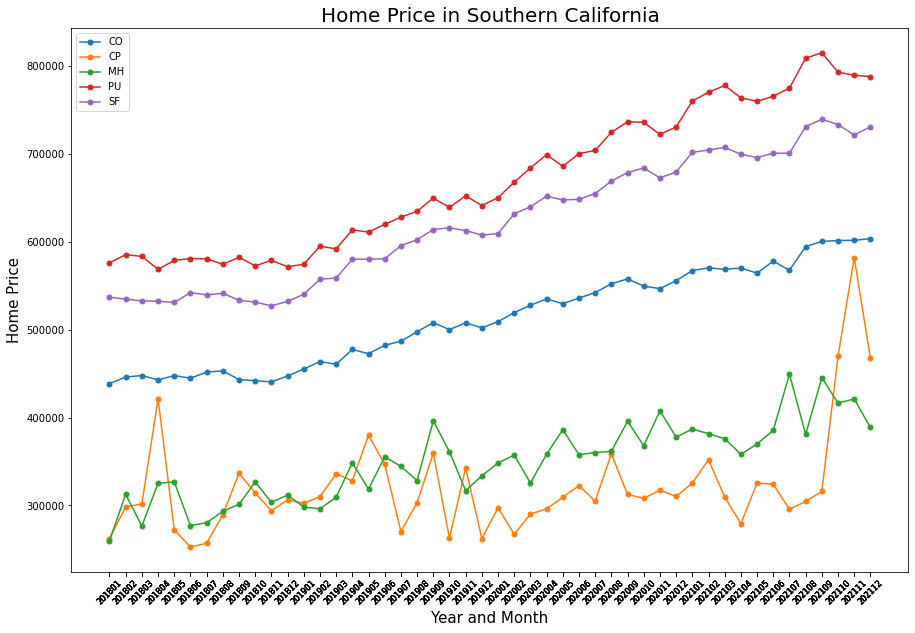

In [93]:
# The above graph mixed all types of houses together. Now we use different colors to separate them
groups = weighted_price.groupby('PROP')

fig, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['year_month'], group['home_price'], marker = 'o', linestyle = '-', ms = 5, label = name)
ax.legend()
ax.set_title('Home Price in Southern California', fontsize = 20)
ax.set_ylabel('Home Price', fontsize = 15)
ax.set_xlabel('Year and Month', fontsize = 15)
ax.set_xticks(weighted_price['year_month'])
ax.set_xticklabels(weighted_price['year_month'], rotation = 45, fontsize = 8)

plt.show()

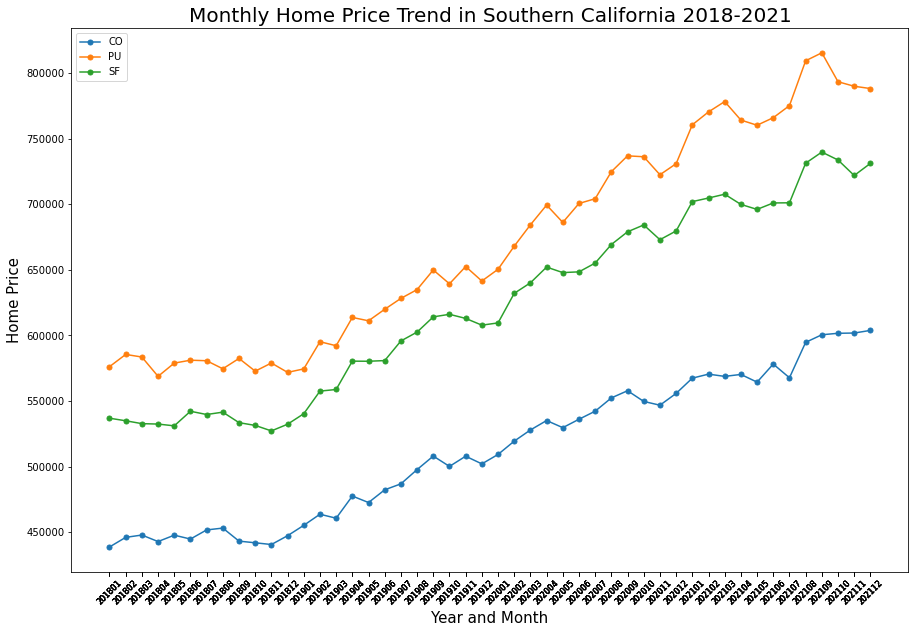

In [94]:
# ignore MH and CP so that the trend would be more accentuated
weighted_price2 = weighted_price[weighted_price['PROP'].isin(['CO', 'PU', 'SF'])]

groups = weighted_price2.groupby('PROP')

fig, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['year_month'], group['home_price'], marker = 'o', linestyle = '-', ms = 5, label = name)
ax.legend(loc = 'upper left')
ax.set_title('Monthly Home Price Trend in Southern California 2018-2021', fontsize = 20)
ax.set_ylabel('Home Price', fontsize = 15)
ax.set_xlabel('Year and Month', fontsize = 15)
ax.set_xticks(weighted_price['year_month'])
ax.set_xticklabels(weighted_price['year_month'], rotation = 45, fontsize = 8)

plt.show()

In [95]:
# Analysis 5: find the areas with good housing investment

# A good area for investment should show steady growth in house price and low volatility in changes of price
#  change in house price: average of % home price changes
#  volatility: standard deviation in % home price changes
df_price_rate.head(20)

,orig_year_month,PROP,ZIP,home_value,home_cnt,Rate,DIFF_price,DIFF_rate,year_month
0,201801,CO,900.0,579159.212880,94,4.03,0.000000,0.00,201801
100,201802,CO,900.0,553846.153846,101,4.33,-25313.059034,0.30,201802
197,201803,CO,900.0,635144.654088,96,4.44,81298.500242,0.11,201803
298,201804,CO,900.0,607319.078947,104,4.47,-27825.575141,0.03,201804
397,201805,CO,900.0,615942.028986,117,4.59,8622.950038,0.12,201805
495,201806,CO,900.0,592318.840580,110,4.57,-23623.188406,-0.02,201806
595,201807,CO,900.0,622222.222222,94,4.53,29903.381643,-0.04,201807
698,201808,CO,900.0,632530.120482,119,4.55,10307.898260,0.02,201808
802,201809,CO,900.0,602000.000000,72,4.63,-30530.120482,0.08,201809
900,201810,CO,900.0,586666.666667,89,4.83,-15333.333333,0.20,201810


In [96]:
# why define the statistics as this
df_price_rate['% price change'] = df_price_rate['DIFF_price'] / sum(df_price_rate['home_value'] - df_price_rate['DIFF_price'])
df_price_rate.head(30)

,orig_year_month,PROP,ZIP,home_value,home_cnt,Rate,DIFF_price,DIFF_rate,year_month,% price change
0,201801,CO,900.0,579159.212880,94,4.03,0.000000,0.00,201801,0.000000e+00
100,201802,CO,900.0,553846.153846,101,4.33,-25313.059034,0.30,201802,-8.683004e-06
197,201803,CO,900.0,635144.654088,96,4.44,81298.500242,0.11,201803,2.788739e-05
298,201804,CO,900.0,607319.078947,104,4.47,-27825.575141,0.03,201804,-9.544860e-06
397,201805,CO,900.0,615942.028986,117,4.59,8622.950038,0.12,201805,2.957885e-06
495,201806,CO,900.0,592318.840580,110,4.57,-23623.188406,-0.02,201806,-8.103337e-06
595,201807,CO,900.0,622222.222222,94,4.53,29903.381643,-0.04,201807,1.025760e-05
698,201808,CO,900.0,632530.120482,119,4.55,10307.898260,0.02,201808,3.535864e-06
802,201809,CO,900.0,602000.000000,72,4.63,-30530.120482,0.08,201809,-1.047259e-05
900,201810,CO,900.0,586666.666667,89,4.83,-15333.333333,0.20,201810,-5.259712e-06


In [97]:
df_price_stability = df_price_rate.groupby(['PROP', 'ZIP'])['% price change'].mean().reset_index().rename(columns = {'% price change': 'home price growth'})
df_price_volatility = df_price_rate.groupby(['PROP', 'ZIP'])['% price change'].std().reset_index().rename(columns = {'% price change': 'home price volatility'})

In [98]:
price_stability_volatility = pd.merge(df_price_stability, df_price_volatility, on = ['PROP', 'ZIP'], how = 'inner')
price_stability_volatility.head()

,PROP,ZIP,home price growth,home price volatility
0,CO,900.0,0.000001,0.000009
1,CO,902.0,0.000001,0.000017
2,CO,903.0,0.000001,0.000013
3,CO,904.0,0.000002,0.000063
4,CO,905.0,0.000001,0.000019


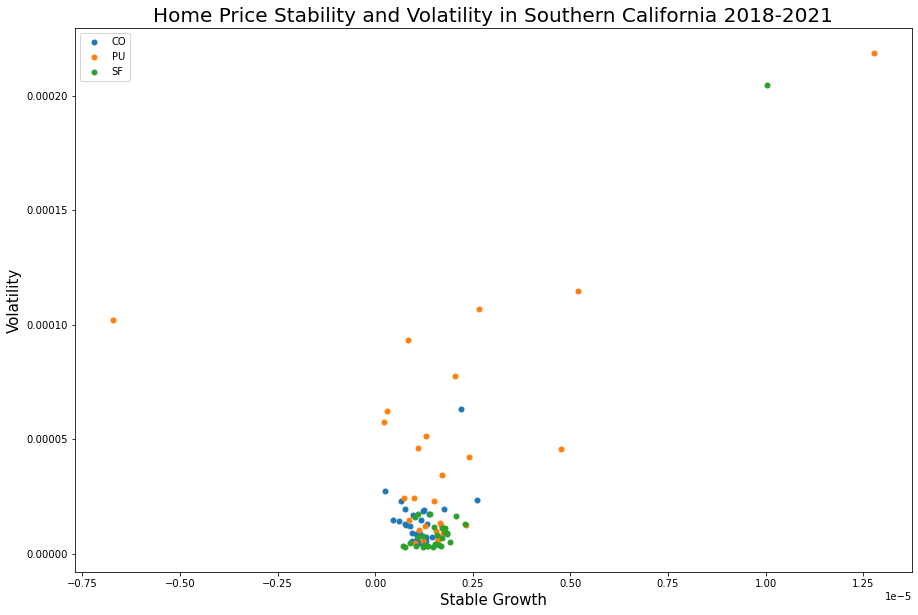

In [100]:
price_stability_volatility2 = price_stability_volatility[price_stability_volatility['PROP'].isin(['CO', 'PU', 'SF'])]

groups = price_stability_volatility2.groupby('PROP')

fig, ax = plt.subplots(figsize = (15, 10))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['home price growth'], group['home price volatility'], marker = 'o', linestyle = " ", ms = 5, label = name)
ax.legend(loc = 'upper left')
ax.set_title('Home Price Stability and Volatility in Southern California 2018-2021', fontsize = 20)
ax.set_ylabel('Volatility', fontsize = 15)
ax.set_xlabel('Stable Growth', fontsize = 15)

plt.show()

In [101]:
# the area with large price drop
price_stability_volatility2[price_stability_volatility2['home price growth'] < -0.000005]

,PROP,ZIP,home price growth,home price volatility
58,PU,900.0,-0.000007,0.000102


In [102]:
# find the area in the list of zip code
zipcode = pd.read_excel(path + 'zip_code_database.xls')
zipcode.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631.0,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631.0,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,787939.0,NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,787939.0,NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787.0,NaN,US,18.43,-67.15,0


In [103]:
zipcode[(zipcode['zip'] / 100).apply(np.floor) == 900]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
38211,90001,STANDARD,0,Los Angeles,"Firestone Park, Firestone Pk",NaN,CA,Los Angeles County,America/Los_Angeles,3.230000e+02,NaN,US,33.97,-118.24,49200
38212,90002,STANDARD,0,Los Angeles,Watts,NaN,CA,Los Angeles County,America/Los_Angeles,3.235620e+05,NaN,US,33.94,-118.24,45530
38213,90003,STANDARD,0,Los Angeles,NaN,Broadway Manchester,CA,Los Angeles County,America/Los_Angeles,3.230000e+02,NaN,US,33.96,-118.27,62390
38214,90004,STANDARD,0,Los Angeles,Oakwood,NaN,CA,Los Angeles County,America/Los_Angeles,3.230000e+02,NaN,US,34.07,-118.31,46650
38215,90005,STANDARD,0,Los Angeles,Sanford,NaN,CA,Los Angeles County,America/Los_Angeles,2.133103e+17,NaN,US,34.06,-118.31,27590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38301,90093,PO BOX,0,Los Angeles,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,2.130000e+02,NaN,US,34.09,-118.33,485
38302,90094,STANDARD,0,Playa Vista,Los Angeles,NaN,CA,Los Angeles County,America/Los_Angeles,3.230000e+02,NaN,US,33.98,-118.42,8200
38303,90095,UNIQUE,0,Los Angeles,NaN,Uc Los Angeles,CA,Los Angeles County,America/Los_Angeles,2.130000e+02,NaN,US,34.07,-118.44,82
38304,90096,UNIQUE,0,Los Angeles,NaN,Shared Firm Zip Code,CA,Los Angeles County,America/Los_Angeles,2.130000e+02,NaN,US,33.96,-118.17,0


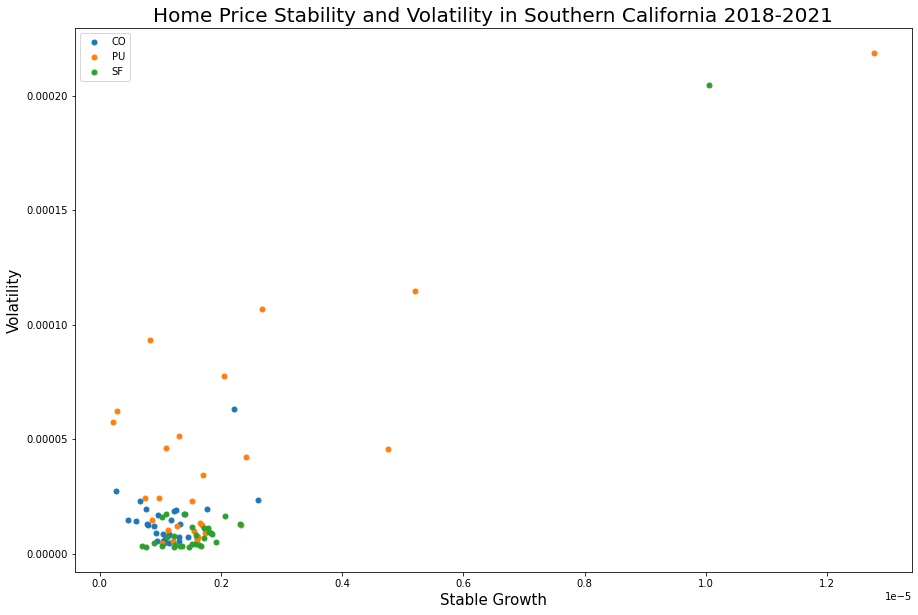

In [104]:
price_stability_volatility2=price_stability_volatility[(price_stability_volatility['PROP'].isin(['CO', 'PU', 'SF']))
                                                      & (price_stability_volatility['home price growth'] > 0)]

groups=price_stability_volatility2.groupby('PROP')

# Plot
#fig, ax = plt.subplots()
fig, ax=plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['home price growth'], group['home price volatility'], marker='o', linestyle=" ", ms=5, label=name)
ax.legend(loc='upper left')
ax.set_title('Home Price Stability and Volatility in Southern California 2018-2021', fontsize=20)
ax.set_ylabel('Volatility', fontsize=15)
ax.set_xlabel('Stable Growth', fontsize=15)

plt.show()

In [106]:
# find the row with good home price growth and relatively lowr volatility
price_stability_volatility2[(price_stability_volatility2['home price growth'] > 0.000004) 
                           & (price_stability_volatility2['home price volatility'] < 0.00005)]

,PROP,ZIP,home price growth,home price volatility
72,PU,916.0,0.000005,0.000046


In [107]:
zipcode[(zipcode['zip']/100).apply(np.floor)==916]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
38671,91601,STANDARD,0,North Hollywood,"N Hollywood, Toluca Ter, Toluca Terrace, Valle...",NaN,CA,Los Angeles County,America/Los_Angeles,818323.0,NaN,US,34.16,-118.37,30880
38672,91602,STANDARD,0,North Hollywood,"N Hollywood, Studio City, Toluca Lake, W Toluc...",NaN,CA,Los Angeles County,America/Los_Angeles,323818.0,NaN,US,34.15,-118.36,16070
38673,91603,PO BOX,0,North Hollywood,N Hollywood,NaN,CA,Los Angeles County,America/Los_Angeles,213.0,NaN,US,34.16,-118.37,368
38674,91604,STANDARD,0,Studio City,"N Hollywood, North Hollywood",NaN,CA,Los Angeles County,America/Los_Angeles,213.0,NaN,US,34.13,-118.39,25640
38675,91605,STANDARD,0,North Hollywood,N Hollywood,NaN,CA,Los Angeles County,America/Los_Angeles,323818.0,NaN,US,34.20,-118.39,46560
38676,91606,STANDARD,0,North Hollywood,"N Hollywood, Valley Glen",NaN,CA,Los Angeles County,America/Los_Angeles,818323.0,NaN,US,34.18,-118.39,36390
38677,91607,STANDARD,0,Valley Village,"N Hollywood, North Hollywood, Sherman Village,...",NaN,CA,Los Angeles County,America/Los_Angeles,323818.0,NaN,US,34.16,-118.40,25230
38678,91608,STANDARD,0,Universal City,"N Hollywood, North Hollywood, Universal Cty",NaN,CA,Los Angeles County,America/Los_Angeles,213.0,NaN,US,34.14,-118.35,27
38679,91609,PO BOX,0,North Hollywood,N Hollywood,NaN,CA,Los Angeles County,America/Los_Angeles,213.0,NaN,US,34.18,-118.38,357
38680,91610,PO BOX,0,Toluca Lake,"N Hollywood, North Hollywood",NaN,CA,Los Angeles County,America/Los_Angeles,213.0,NaN,US,34.15,-118.37,355


In [108]:
print(zipcode[(zipcode['zip']/100).apply(np.floor)==916].groupby('primary_city')['zip'].count())
print(zipcode[(zipcode['zip']/100).apply(np.floor)==916].groupby('area_codes')['zip'].count())

primary_city
North Hollywood    11
Studio City         2
Toluca Lake         1
Universal City      1
Valley Village      2
Name: zip, dtype: int64
area_codes
213.0       12
323818.0     3
818323.0     2
Name: zip, dtype: int64


In [109]:
# Conclusion: investing in PUD (planned Unit development), north Hollywood with are code 213 is the best location

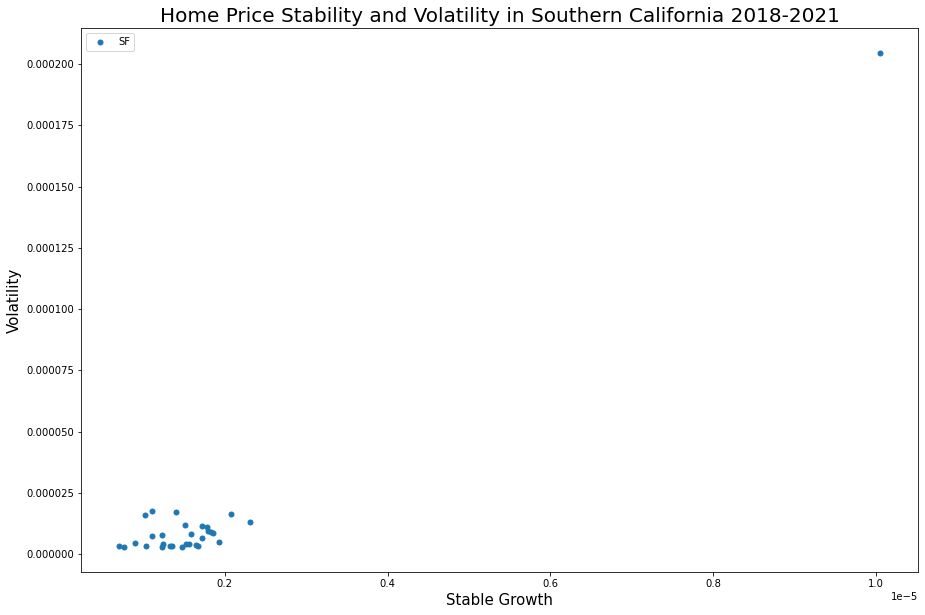

In [110]:
# One wants to invest in single-family home only
price_stability_volatility2=price_stability_volatility[(price_stability_volatility['PROP']=='SF')
                                                      & (price_stability_volatility['home price growth'] > 0)]

groups=price_stability_volatility2.groupby('PROP')

# Plot
#fig, ax = plt.subplots()
fig, ax=plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['home price growth'], group['home price volatility'], marker='o', linestyle=" ", ms=5, label=name)
ax.legend(loc='upper left')
ax.set_title('Home Price Stability and Volatility in Southern California 2018-2021', fontsize=20)
ax.set_ylabel('Volatility', fontsize=15)
ax.set_xlabel('Stable Growth', fontsize=15)

plt.show()

In [111]:
# find the one with highest growth
price_stability_volatility2[price_stability_volatility2['home price growth'] > 0.000008]

,PROP,ZIP,home price growth,home price volatility
91,SF,904.0,0.00001,0.000205


In [112]:
zipcode[(zipcode['zip']/100).apply(np.floor)==904]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
38376,90401,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310424.0,NaN,US,34.01,-118.49,6160
38377,90402,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.03,-118.50,9290
38378,90403,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310424.0,NaN,US,34.03,-118.49,20320
38379,90404,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310424.0,NaN,US,34.02,-118.47,16950
38380,90405,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310424.0,NaN,US,34.01,-118.46,23190
38381,90406,PO BOX,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.01,-118.49,1168
38382,90407,PO BOX,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.01,-118.49,0
38383,90408,PO BOX,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.02,-118.48,292
38384,90409,PO BOX,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.00,-118.48,254
38385,90410,PO BOX,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,310.0,NaN,US,34.01,-118.46,0


In [113]:
# It's an outlier. It has the biggest increase in home price, but also the highest volatility

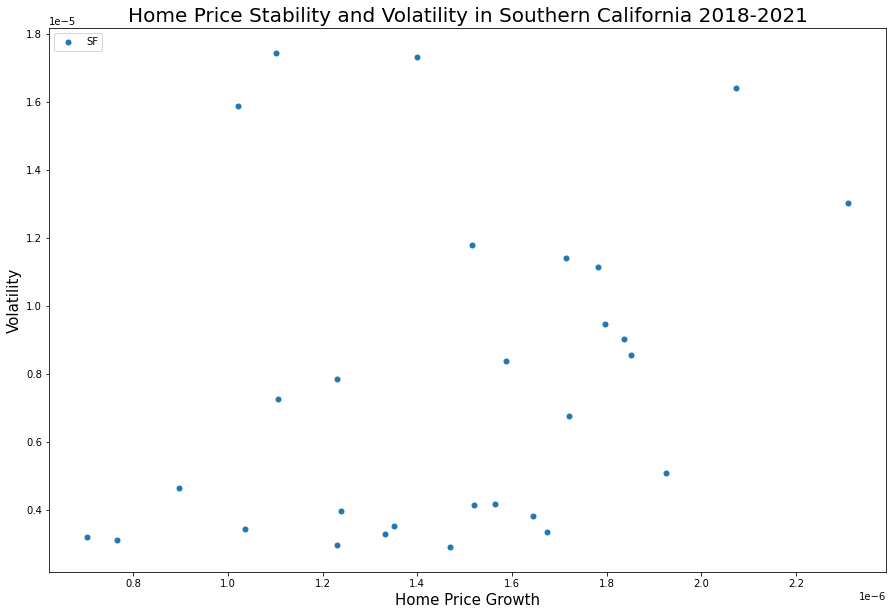

In [114]:
# Let‘s exclude the outlier
price_stability_volatility2=price_stability_volatility[(price_stability_volatility['PROP']=='SF')
                                                      & (price_stability_volatility['home price growth'] > 0)
                                                       & (price_stability_volatility['home price growth'] < 0.000004)                                                   
                                                      & (price_stability_volatility['home price growth'] < 0.000025)]

groups=price_stability_volatility2.groupby('PROP')

# Plot
#fig, ax = plt.subplots()
fig, ax=plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['home price growth'], group['home price volatility'], marker='o', linestyle=" ", ms=5, label=name)
ax.legend(loc='upper left')
ax.set_title('Home Price Stability and Volatility in Southern California 2018-2021', fontsize=20)
ax.set_ylabel('Volatility', fontsize=15)
ax.set_xlabel('Home Price Growth', fontsize=15)

plt.show()

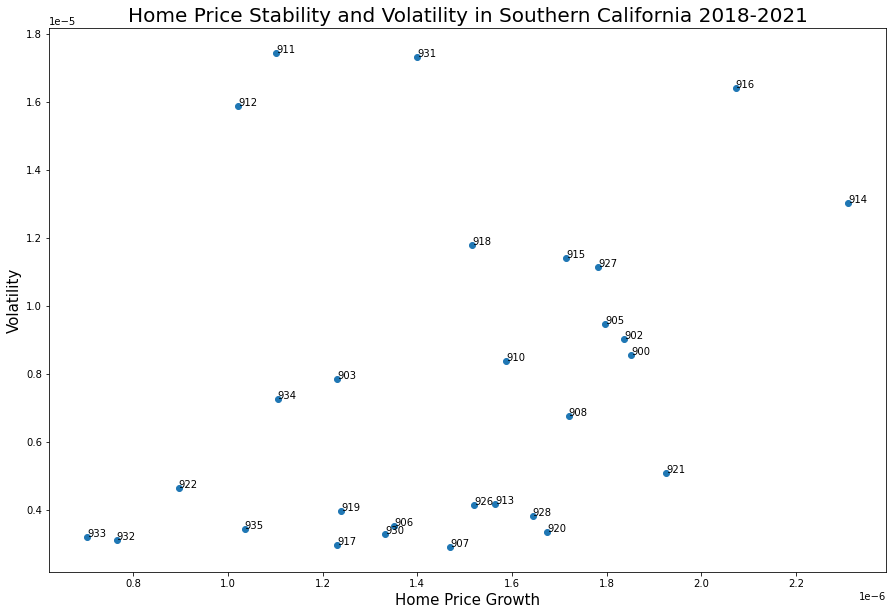

In [115]:
# add label of 3-digit zip code to each point
price_stability_volatility2=price_stability_volatility[(price_stability_volatility['PROP']=='SF')
                                                      & (price_stability_volatility['home price growth'] > 0)
                                                       & (price_stability_volatility['home price growth'] < 0.000004)                                                   
                                                      & (price_stability_volatility['home price growth'] < 0.000025)]

price_stability_volatility2=price_stability_volatility2.reset_index()
price_stability_volatility2['zipcode']=price_stability_volatility2['ZIP'].astype(int)

x=price_stability_volatility2['home price growth']
y=price_stability_volatility2['home price volatility']
zip_code=price_stability_volatility2['zipcode']

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x, y)
ax.set_title('Home Price Stability and Volatility in Southern California 2018-2021', fontsize=20)
ax.set_ylabel('Volatility', fontsize=15)
ax.set_xlabel('Home Price Growth', fontsize=15)

for i, txt in enumerate(zip_code):
    ax.annotate(txt, (x[i], y[i]))

In [116]:
price_stability_volatility2.head()

,index,PROP,ZIP,home price growth,home price volatility,zipcode
0,88,SF,900.0,0.000002,0.000009,900
1,89,SF,902.0,0.000002,0.000009,902
2,90,SF,903.0,0.000001,0.000008,903
3,92,SF,905.0,0.000002,0.000009,905
4,93,SF,906.0,0.000001,0.000004,906


In [117]:
# find the one with highest growth and biggest volatility
price_stability_volatility2[(price_stability_volatility2['home price growth'] > 0.0000018) 
                           & (price_stability_volatility2['home price volatility'] < 0.000006) ]

,index,PROP,ZIP,home price growth,home price volatility,zipcode
18,107,SF,921.0,0.000002,0.000005,921


In [118]:
zipcode[(zipcode['zip']/100).apply(np.floor)==921]

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
38868,92101,STANDARD,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619858.0,NaN,US,32.71,-117.16,31260
38869,92102,STANDARD,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619858.0,NaN,US,32.72,-117.09,37370
38870,92103,STANDARD,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619760858.0,NaN,US,32.74,-117.17,27520
38871,92104,STANDARD,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,858619760.0,NaN,US,32.73,-117.12,37670
38872,92105,STANDARD,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619858.0,NaN,US,32.73,-117.08,60150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38948,92195,PO BOX,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619.0,NaN,US,32.74,-117.05,682
38949,92196,PO BOX,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619.0,NaN,US,32.91,-117.12,1108
38950,92197,PO BOX,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619.0,NaN,US,32.83,-117.20,0
38951,92198,PO BOX,0,San Diego,NaN,NaN,CA,San Diego County,America/Los_Angeles,619.0,NaN,US,32.99,-117.07,1019


In [119]:
print(zipcode[(zipcode['zip']/100).apply(np.floor)==921].groupby('primary_city')['zip'].count())
print(zipcode[(zipcode['zip']/100).apply(np.floor)==921].groupby('area_codes')['zip'].count())

primary_city
Coronado       2
San Diego     81
San Ysidro     2
Name: zip, dtype: int64
area_codes
619.0          60
858.0           2
619858.0       13
858619.0        3
619760858.0     5
858619760.0     2
Name: zip, dtype: int64


In [ ]:
# Conclusion: to invest in single-family home, San Diego with area code 619 is the best location